In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# View Data

In [3]:
df_HousingPrice = pd.read_csv('Data_BatDongSan.csv' , encoding='utf-8')
df_HousingPrice.head(10)

,Title,Area,Price,Bedrooms,Bathrooms,Address
0,"BÁN CĂN HỘ VINHOMES CENTRAL PARK 121M2 3PN, PH...",121 m²,8.1 tỷ,3,2.0,"Bình Thạnh, Hồ Chí Minh"
1,"BÁN CĂN Q7 RIVERSIDE GIÁ HỖ TRỢ CHỈ 1.95 TỶ, Y...",53 m²,1.95 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"
2,THANH LÝ 10 CĂN Q7 RIVERSIDE DO KHÁCH HÀNG MẤT...,53 m²,1.7 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"
3,"CHIẾT KHẨU 25% CC GRAND SUNLAKE, BÀN GIAO FULL...",70 m²,2.3 tỷ,3,2.0,"Hà Đông, Hà Nội"
4,(HHL TEAM - ĐƠN VỊ SỐ 1 Q7) CẬP NHẬT GIÁ T4/20...,67 m²,2.4 tỷ,2,2.0,"Quận 7, Hồ Chí Minh"
5,"CHUYÊN BÁN CH VINHOMES CENTRAL PARK, CH 1 - 2 ...",83 m²,4.1 tỷ,2,2.0,"Bình Thạnh, Hồ Chí Minh"
6,ĐỘC QUYỀN GIỎ CĂN HỘ Q7 RIVERSIDE GIÁ TỐT NHẤT...,66.66 m²,2.453 tỷ,2,2.0,"Quận 7, Hồ Chí Minh"
7,"CHO CON HỌC THỦY ĐIỂN CĂN GÓC 73M2, AM HIỂU PH...",73 m²,Giá thỏa thuận,2,2.0,"Quận 7, Hồ Chí Minh"
8,GIỎ HÀNG CĂN HỘ ECO GREEN CẦN BÁN GIÁ CĐT 2PN ...,66 m²,3.44 tỷ,2,2.0,"Quận 7, Hồ Chí Minh"
9,(BQL TEAM - BEST ONE) GIÁ BÁN MỚI NHẤT: (1PN 1...,50 m²,1.8 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"


In [4]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      19779 non-null  object 
 1   Area       19779 non-null  object 
 2   Price      19779 non-null  object 
 3   Bedrooms   19779 non-null  int64  
 4   Bathrooms  19739 non-null  float64
 5   Address    19779 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 927.3+ KB


In [5]:
df_HousingPrice["Title"] = df_HousingPrice["Title"].str.lower()
lst_note = ["biệt thự" , "mặt tiền" , "penhouse"]
# lst_note = ["mặt tiền"]
df_HousingPrice[df_HousingPrice["Title"].str.contains('|'.join(lst_note))]

,Title,Area,Price,Bedrooms,Bathrooms,Address
20,"bán căn hộ akari city, mặt tiền võ văn kiệt, b...",64 m²,3.3 tỷ,2,2.0,"·\nBình Tân, Hồ Chí Minh"
83,"bán penhouse tại phú mỹ hưng, q7 đủ loại diện ...",224 m²,18.5 tỷ,3,3.0,"·\nQuận 7, Hồ Chí Minh"
109,"chính chủ bán căn 3pn, mặt tiền mai chí thọ, q...",88 m²,5.1 tỷ,3,2.0,"Quận 2, Hồ Chí Minh"
153,"căn hộ 2pn 75m2 giá 2.5 tỷ, 3pn 90m2 giá 2.85 ...",75 m²,2.5 tỷ,2,1.0,"Tân Phú, Hồ Chí Minh"
181,căn hộ 1pn - 4pn và penhouse chung cư era town...,48 m²,1.55 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"
...,...,...,...,...,...,...
19351,"thật 100%! bán nam phúc 3pn, 122m2, view biệt ...",122 m²,6.4 tỷ,3,2.0,"Quận 7, Hồ Chí Minh"
19539,em thăng tpkd có 1 suất penhouse dragon castle...,97 m²,2.2 tỷ,3,2.0,"Hạ Long, Quảng Ninh"
19608,hotline penhouse dreamland bonanza 23 duy tân:...,300 m²,Giá thỏa thuận,5,0.0,"Nam Từ Liêm, Hà Nội"
19618,sở hữu căn hộ cao cấp nằm tại mặt tiền đường h...,90 m²,5.85 tỷ,3,2.0,"Quận 6, Hồ Chí Minh"


# Preprocessing Data

In [6]:
df_HousingPrice["Facade"] = ""
df_HousingPrice["Villa"] = ""
df_HousingPrice["Penhouse"] = ""

In [7]:
df_HousingPrice.head()

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse
0,"bán căn hộ vinhomes central park 121m2 3pn, ph...",121 m²,8.1 tỷ,3,2.0,"Bình Thạnh, Hồ Chí Minh",,,
1,"bán căn q7 riverside giá hỗ trợ chỉ 1.95 tỷ, y...",53 m²,1.95 tỷ,1,1.0,"Quận 7, Hồ Chí Minh",,,
2,thanh lý 10 căn q7 riverside do khách hàng mất...,53 m²,1.7 tỷ,1,1.0,"Quận 7, Hồ Chí Minh",,,
3,"chiết khẩu 25% cc grand sunlake, bàn giao full...",70 m²,2.3 tỷ,3,2.0,"Hà Đông, Hà Nội",,,
4,(hhl team - đơn vị số 1 q7) cập nhật giá t4/20...,67 m²,2.4 tỷ,2,2.0,"Quận 7, Hồ Chí Minh",,,


In [8]:
import re
# Tìm kiếm số lượng mặt tiền
regex_facade = r'(\d+\s+)?mặt tiền'
df_HousingPrice["Facade"] = df_HousingPrice["Title"].str.extract(regex_facade)
df_HousingPrice["Facade"] = df_HousingPrice["Facade"].astype(float)

In [9]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      19779 non-null  object 
 1   Area       19779 non-null  object 
 2   Price      19779 non-null  object 
 3   Bedrooms   19779 non-null  int64  
 4   Bathrooms  19739 non-null  float64
 5   Address    19779 non-null  object 
 6   Facade     12 non-null     float64
 7   Villa      19779 non-null  object 
 8   Penhouse   19779 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [10]:
df_HousingPrice[df_HousingPrice["Facade"] > 0]

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse
3036,bán căn hộ quận 7 mặt tiền đào trí giá 2.550 tỷ,67 m²,2.6 tỷ,2,1.0,"Quận 7, Hồ Chí Minh",7.0,,
3136,căn hộ thông minh 4 mặt tiền 01 nguyễn tất thà...,70 m²,2.7 tỷ,2,0.0,"Quy Nhơn, Bình Định",4.0,,
5484,cắt lỗ 300 triệu the antonia 4 mặt tiền nguyễn...,89 m²,6 tỷ,2,2.0,"Quận 7, Hồ Chí Minh",4.0,,
9753,"bán ""hoa hậu"" góc 3 ngủ 96m2 ban công đông nam...",96 m²,3.852 tỷ,3,3.0,"Hà Đông, Hà Nội",2.0,,
9769,"bán ""hoa hậu"" góc 3 ngủ 96m2 ban công đông nam...",96 m²,3.852 tỷ,3,0.0,"Hà Đông, Hà Nội",2.0,,
10872,"bán căn hộ q.9 mặt tiền xa lộ hà nội, metro st...",61 m²,2.18 tỷ,2,2.0,"Quận 9, Hồ Chí Minh",9.0,,
12675,"căn 1pn 51,34m2 mặt tiền vành đai 2 - chỉ 3,5 ...",51.34 m²,3.5 tỷ,1,2.0,"Thủ Đức, Hồ Chí Minh",2.0,,
12680,"căn 1pn 51,34m2 mặt tiền vành đai 2 - chỉ 3,5 ...",51.34 m²,3.5 tỷ,1,1.0,"Thủ Đức, Hồ Chí Minh",2.0,,
14610,xuất ngoại bán gấp căn hộ 3pn 79.3m2 3 mặt tiề...,79.3 m²,2.15 tỷ,3,2.0,"Thuận An, Bình Dương",3.0,,
18796,căn hộ 3 mặt tiền - 3 lần tăng giá trị tại mt ...,63.4 m²,2.52 tỷ,1,2.0,"Quận 9, Hồ Chí Minh",3.0,,


In [11]:
# xử lý số lượng mặt tiền chưa phù hợp với thực tế
df_HousingPrice["Facade"].mask(df_HousingPrice["Facade"] == 7 , 1 , inplace=True)
df_HousingPrice["Facade"].mask(df_HousingPrice["Facade"] == 9 , 1 , inplace=True)
df_HousingPrice[df_HousingPrice["Facade"] > 0]

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse
3036,bán căn hộ quận 7 mặt tiền đào trí giá 2.550 tỷ,67 m²,2.6 tỷ,2,1.0,"Quận 7, Hồ Chí Minh",1.0,,
3136,căn hộ thông minh 4 mặt tiền 01 nguyễn tất thà...,70 m²,2.7 tỷ,2,0.0,"Quy Nhơn, Bình Định",4.0,,
5484,cắt lỗ 300 triệu the antonia 4 mặt tiền nguyễn...,89 m²,6 tỷ,2,2.0,"Quận 7, Hồ Chí Minh",4.0,,
9753,"bán ""hoa hậu"" góc 3 ngủ 96m2 ban công đông nam...",96 m²,3.852 tỷ,3,3.0,"Hà Đông, Hà Nội",2.0,,
9769,"bán ""hoa hậu"" góc 3 ngủ 96m2 ban công đông nam...",96 m²,3.852 tỷ,3,0.0,"Hà Đông, Hà Nội",2.0,,
10872,"bán căn hộ q.9 mặt tiền xa lộ hà nội, metro st...",61 m²,2.18 tỷ,2,2.0,"Quận 9, Hồ Chí Minh",1.0,,
12675,"căn 1pn 51,34m2 mặt tiền vành đai 2 - chỉ 3,5 ...",51.34 m²,3.5 tỷ,1,2.0,"Thủ Đức, Hồ Chí Minh",2.0,,
12680,"căn 1pn 51,34m2 mặt tiền vành đai 2 - chỉ 3,5 ...",51.34 m²,3.5 tỷ,1,1.0,"Thủ Đức, Hồ Chí Minh",2.0,,
14610,xuất ngoại bán gấp căn hộ 3pn 79.3m2 3 mặt tiề...,79.3 m²,2.15 tỷ,3,2.0,"Thuận An, Bình Dương",3.0,,
18796,căn hộ 3 mặt tiền - 3 lần tăng giá trị tại mt ...,63.4 m²,2.52 tỷ,1,2.0,"Quận 9, Hồ Chí Minh",3.0,,


In [12]:
# Tìm kiếm xem có phải dạng villa hay penhouse hay không
regex_villa = r'\b(biệt thự)\b'
regex_penthouse = r'\b(penthouse)\b'
df_HousingPrice["Villa"] = df_HousingPrice["Title"].str.extract(regex_villa)
df_HousingPrice["Penhouse"] = df_HousingPrice["Title"].str.extract(regex_penthouse)

In [13]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      19779 non-null  object 
 1   Area       19779 non-null  object 
 2   Price      19779 non-null  object 
 3   Bedrooms   19779 non-null  int64  
 4   Bathrooms  19739 non-null  float64
 5   Address    19779 non-null  object 
 6   Facade     12 non-null     float64
 7   Villa      85 non-null     object 
 8   Penhouse   263 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [14]:
df_HousingPrice["Villa"].mask(df_HousingPrice["Villa"] == 'biệt thự' , 1 , inplace=True)
df_HousingPrice[df_HousingPrice["Villa"] == 1]

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse
445,chính chủ cần bán căn chung cư diamond skylink...,238.8 m²,13.61 tỷ,3,2.0,"Tân Phú, Hồ Chí Minh",NaN,1,NaN
469,sang nhượng căn hộ aria vũng tàu - view biển: ...,115.8 m²,2.5 tỷ,2,2.0,"Vũng Tàu, Bà Rịa Vũng Tàu",NaN,1,NaN
577,cần bán gấp sky oasis mới bàn giao view biệt t...,81.43 m²,3.3 tỷ,3,2.0,"Văn Giang, Hưng Yên",NaN,1,NaN
796,"cần bán gấp ch hưng phúc, pmh, 78m2, 2pn full ...",78 m²,5.2 tỷ,2,2.0,"Quận 7, Hồ Chí Minh",NaN,1,NaN
1121,"bán nhanh căn hộ 3pn - 120m2, view sông biệt t...",120 m²,6.9 tỷ,3,2.0,"Quận 7, Hồ Chí Minh",NaN,1,NaN
...,...,...,...,...,...,...,...,...,...
18620,gia đình chuyển xuống biệt thự cần bán gấp căn...,136 m²,8.5 tỷ,4,0.0,"Hai Bà Trưng, Hà Nội",NaN,1,NaN
18622,sunrise city - sunrise city view chcc q7 - 2pn...,97 m²,4.5 tỷ,2,2.0,"Quận 7, Hồ Chí Minh",NaN,1,NaN
18945,"bán ch chung cư 173 xuân thủy, 100m2, 3pn, vie...",100 m²,3.7 tỷ,3,2.0,"Cầu Giấy, Hà Nội",NaN,1,NaN
19197,"bán căn góc b09, dt 97m2, 3pn, 2vs, view biệt ...",97 m²,4.2 tỷ,3,2.0,"Hoàng Mai, Hà Nội",NaN,1,NaN


In [15]:
df_HousingPrice["Penhouse"].mask(df_HousingPrice["Penhouse"] == 'penthouse' , 1 , inplace=True)
df_HousingPrice[df_HousingPrice["Penhouse"] == 1]

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse
65,"bán căn hộ 2 phòng ngủ full nội thất, rẻ nhất ...",73 m²,13.9 tỷ,2,2.0,"·\nQuận 1, Hồ Chí Minh",NaN,NaN,1
132,penthouse thảo điền quận 2 - 1 trệt 1 lầu - că...,277 m²,16 tỷ,4,0.0,"Quận 2, Hồ Chí Minh",NaN,NaN,1
133,"tổng hợp vinhomes skylake 1p, 2pn từ 2.8tỷ - 3...",70 m²,3.8 tỷ,2,5.0,"Nam Từ Liêm, Hà Nội",NaN,NaN,1
184,"phú mỹ hưng bán căn 2pn, 3pn, shophouse, penth...",115 m²,Giá thỏa thuận,3,0.0,"Quận 7, Hồ Chí Minh",NaN,NaN,1
191,"one verandah mua trực tiếp cđt 2-3pn, duplex, ...",81 m²,5.1 tỷ,2,0.0,"Quận 2, Hồ Chí Minh",NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
18969,bán căn penthouse 196m2 chung cư star city lê ...,196 m²,Giá thỏa thuận,3,0.0,"Thanh Xuân, Hà Nội",NaN,NaN,1
19292,duy nhất còn 1 slot căn góc penthouse dragon c...,116 m²,3.1 tỷ,3,0.0,"Hạ Long, Quảng Ninh",NaN,NaN,1
19468,cần tiền bán gấp penthouse mỹ đức phú mỹ hưng ...,190 m²,8.2 tỷ,3,3.0,"Quận 7, Hồ Chí Minh",NaN,NaN,1
19761,"bán penthouse iris garden - mỹ đình, thiết kế ...",185 m²,7.5 tỷ,4,4.0,"Nam Từ Liêm, Hà Nội",NaN,NaN,1


In [16]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      19779 non-null  object 
 1   Area       19779 non-null  object 
 2   Price      19779 non-null  object 
 3   Bedrooms   19779 non-null  int64  
 4   Bathrooms  19739 non-null  float64
 5   Address    19779 non-null  object 
 6   Facade     12 non-null     float64
 7   Villa      85 non-null     object 
 8   Penhouse   263 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [17]:
df_HousingPrice["Villa"] = df_HousingPrice["Villa"].apply(float)
df_HousingPrice["Penhouse"] = df_HousingPrice["Penhouse"].apply(float)

In [18]:
df_HousingPrice["Address"].value_counts()

Nam Từ Liêm, Hà Nội                  1878
Quận 7, Hồ Chí Minh                  1393
Quận 2, Hồ Chí Minh                  1339
Cầu Giấy, Hà Nội                     1133
Hà Đông, Hà Nội                      1052
                                     ... 
·\nQuận 4, Hồ Chí Minh                  1
·\nLong Biên, Hà Nội                    1
Bất động sản Úc,                        1
·\nHạ Long, Quảng Ninh                  1
Phan Rang - Tháp Chàm, Ninh Thuận       1
Name: Address, Length: 118, dtype: int64

In [19]:
# cleann address
def clean_address(address):
    if '\n' in address:
        res = address.replace("·\n" , "")
        return res
    return address

In [20]:
df_HousingPrice["Address"] = df_HousingPrice["Address"].apply(clean_address)
df_HousingPrice["Address"].value_counts()

Nam Từ Liêm, Hà Nội                  1887
Quận 7, Hồ Chí Minh                  1398
Quận 2, Hồ Chí Minh                  1346
Cầu Giấy, Hà Nội                     1136
Hà Đông, Hà Nội                      1057
                                     ... 
Phúc Yên, Vĩnh Phúc                     1
Long Điền, Bà Rịa Vũng Tàu              1
Thạch Thất, Hà Nội                      1
Huế, Thừa Thiên Huế                     1
Phan Rang - Tháp Chàm, Ninh Thuận       1
Name: Address, Length: 95, dtype: int64

In [21]:
# processing price
def get_price(price):
    if "triệu" in price:
        temp = price.split(' ')
        return float(temp[0]) / 1000
    elif "tỷ" in price:
        temp = price.split(' ')
        return float(temp[0])
    elif "Giá" in price:
        return np.NaN

In [22]:
df_HousingPrice["Price"] = df_HousingPrice["Price"].apply(get_price)

In [23]:
# processing acreage
def get_Acreage(acreage):
    val = acreage.split(" ")
    return float(val[0])

In [24]:
df_HousingPrice["Area"] = df_HousingPrice["Area"].apply(get_Acreage)

In [25]:
def get_District(address):
    val = address.split(",")
    return val[0]

In [26]:
df_HousingPrice["District"] = df_HousingPrice["Address"].apply(get_District)

In [27]:
def get_City(address):
    val = address.split(",")
    if val[1] != "":
        return val[1]
    return ""

In [28]:
df_HousingPrice["City"] = df_HousingPrice["Address"].apply(get_City)

In [29]:
df_HousingPrice

,Title,Area,Price,Bedrooms,Bathrooms,Address,Facade,Villa,Penhouse,District,City
0,"bán căn hộ vinhomes central park 121m2 3pn, ph...",121.0,8.10,3,2.0,"Bình Thạnh, Hồ Chí Minh",NaN,NaN,NaN,Bình Thạnh,Hồ Chí Minh
1,"bán căn q7 riverside giá hỗ trợ chỉ 1.95 tỷ, y...",53.0,1.95,1,1.0,"Quận 7, Hồ Chí Minh",NaN,NaN,NaN,Quận 7,Hồ Chí Minh
2,thanh lý 10 căn q7 riverside do khách hàng mất...,53.0,1.70,1,1.0,"Quận 7, Hồ Chí Minh",NaN,NaN,NaN,Quận 7,Hồ Chí Minh
3,"chiết khẩu 25% cc grand sunlake, bàn giao full...",70.0,2.30,3,2.0,"Hà Đông, Hà Nội",NaN,NaN,NaN,Hà Đông,Hà Nội
4,(hhl team - đơn vị số 1 q7) cập nhật giá t4/20...,67.0,2.40,2,2.0,"Quận 7, Hồ Chí Minh",NaN,NaN,NaN,Quận 7,Hồ Chí Minh
...,...,...,...,...,...,...,...,...,...,...,...
19774,03 suất duy nhất hỗ trợ vay ngân hàng tại thủ ...,80.0,4.50,2,0.0,"Quận 2, Hồ Chí Minh",NaN,NaN,NaN,Quận 2,Hồ Chí Minh
19775,"cần bán căn hộ him lam chợ lớn, quận 6. dt 97m...",97.0,3.30,2,2.0,"Quận 6, Hồ Chí Minh",NaN,NaN,NaN,Quận 6,Hồ Chí Minh
19776,"bán gấp 3pn, central 2, 117m2, có sổ, giá bán ...",117.0,8.30,3,2.0,"Bình Thạnh, Hồ Chí Minh",NaN,NaN,NaN,Bình Thạnh,Hồ Chí Minh
19777,"bán penthouse đẳng cấp riverpark pmh, dt 534 m...",534.0,49.90,4,2.0,"Quận 7, Hồ Chí Minh",NaN,NaN,1.0,Quận 7,Hồ Chí Minh


In [30]:
df_HousingPrice["City"].value_counts()

 Hà Nội             9504
 Hồ Chí Minh        7971
 Bình Dương          797
 Hưng Yên            281
 Đà Nẵng             258
 Bà Rịa Vũng Tàu     256
 Khánh Hòa           210
 Hải Phòng           121
 Quảng Ninh          105
 Bình Định            55
 Bắc Ninh             54
 Đồng Nai             53
 Kiên Giang           21
 Thanh Hóa            20
 Nghệ An              16
 Bắc Giang             9
 Long An               7
 Thái Nguyên           7
 Bình Thuận            5
 Vĩnh Phúc             5
 Tây Ninh              5
 Lâm Đồng              5
 Hải Dương             5
 Thái Bình             3
                       1
 Bến Tre               1
 Cần Thơ               1
 Hà Tĩnh               1
 Thừa Thiên Huế        1
 Ninh Thuận            1
Name: City, dtype: int64

In [31]:
df_HousingPrice["District"].value_counts()

Nam Từ Liêm              1887
Quận 7                   1398
Quận 2                   1346
Cầu Giấy                 1136
Hà Đông                  1057
                         ... 
Phúc Yên                    1
Long Điền                   1
Thạch Thất                  1
Huế                         1
Phan Rang - Tháp Chàm       1
Name: District, Length: 95, dtype: int64

# Fill NAN Values

In [32]:
df_HousingPrice = df_HousingPrice.drop(["Title" , "Address"],axis=1)
df_HousingPrice.head()

,Area,Price,Bedrooms,Bathrooms,Facade,Villa,Penhouse,District,City
0,121.0,8.10,3,2.0,NaN,NaN,NaN,Bình Thạnh,Hồ Chí Minh
1,53.0,1.95,1,1.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh
2,53.0,1.70,1,1.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh
3,70.0,2.30,3,2.0,NaN,NaN,NaN,Hà Đông,Hà Nội
4,67.0,2.40,2,2.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh


In [33]:
new_col = df_HousingPrice.pop('Price')
df_HousingPrice.insert(8,'Price',new_col)
df_HousingPrice

,Area,Bedrooms,Bathrooms,Facade,Villa,Penhouse,District,City,Price
0,121.0,3,2.0,NaN,NaN,NaN,Bình Thạnh,Hồ Chí Minh,8.10
1,53.0,1,1.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh,1.95
2,53.0,1,1.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh,1.70
3,70.0,3,2.0,NaN,NaN,NaN,Hà Đông,Hà Nội,2.30
4,67.0,2,2.0,NaN,NaN,NaN,Quận 7,Hồ Chí Minh,2.40
...,...,...,...,...,...,...,...,...,...
19774,80.0,2,0.0,NaN,NaN,NaN,Quận 2,Hồ Chí Minh,4.50
19775,97.0,2,2.0,NaN,NaN,NaN,Quận 6,Hồ Chí Minh,3.30
19776,117.0,3,2.0,NaN,NaN,NaN,Bình Thạnh,Hồ Chí Minh,8.30
19777,534.0,4,2.0,NaN,NaN,1.0,Quận 7,Hồ Chí Minh,49.90


In [34]:
# fill bathrooms
df_HousingPrice["Bathrooms"].value_counts()

2.0     13014
1.0      3222
0.0      2327
3.0       918
4.0       207
5.0        36
6.0        10
7.0         2
29.0        1
10.0        1
8.0         1
Name: Bathrooms, dtype: int64

In [35]:
df_HousingPrice["Bathrooms"] = df_HousingPrice["Bathrooms"].fillna(df_HousingPrice["Bathrooms"].median())

In [36]:
# fill price
df_temp = df_HousingPrice[df_HousingPrice["Price"].isna()]
print("------------Số lượng giá nhà bị thiếu trong mỗi thành phố------------")
df_temp["City"].value_counts()
print("\n------------Số lượng căn hộ trong mỗi thành phố------------")
df_HousingPrice["City"].value_counts()

------------Số lượng giá nhà bị thiếu trong mỗi thành phố------------


 Hà Nội             1272
 Hồ Chí Minh         436
 Bình Dương           70
 Đà Nẵng              45
 Bắc Ninh             28
 Bà Rịa Vũng Tàu      28
 Hưng Yên             24
 Hải Phòng            22
 Khánh Hòa            19
 Quảng Ninh           15
 Thanh Hóa            10
 Thái Nguyên           6
 Bình Định             6
 Nghệ An               2
 Vĩnh Phúc             2
 Bình Thuận            1
 Thái Bình             1
 Kiên Giang            1
 Đồng Nai              1
 Bắc Giang             1
 Ninh Thuận            1
Name: City, dtype: int64


------------Số lượng căn hộ trong mỗi thành phố------------


 Hà Nội             9504
 Hồ Chí Minh        7971
 Bình Dương          797
 Hưng Yên            281
 Đà Nẵng             258
 Bà Rịa Vũng Tàu     256
 Khánh Hòa           210
 Hải Phòng           121
 Quảng Ninh          105
 Bình Định            55
 Bắc Ninh             54
 Đồng Nai             53
 Kiên Giang           21
 Thanh Hóa            20
 Nghệ An              16
 Bắc Giang             9
 Long An               7
 Thái Nguyên           7
 Bình Thuận            5
 Vĩnh Phúc             5
 Tây Ninh              5
 Lâm Đồng              5
 Hải Dương             5
 Thái Bình             3
                       1
 Bến Tre               1
 Cần Thơ               1
 Hà Tĩnh               1
 Thừa Thiên Huế        1
 Ninh Thuận            1
Name: City, dtype: int64

In [37]:
df_HaNoi = df_HousingPrice[df_HousingPrice["City"] == " Hà Nội"]
df_TpHCM = df_HousingPrice[df_HousingPrice["City"] == " Hồ Chí Minh"]
df_BacNinh = df_HousingPrice[df_HousingPrice["City"] == " Bắc Ninh"]
df_ThanhHoa = df_HousingPrice[df_HousingPrice["City"] == " Thanh Hóa"]
df_BD = df_HousingPrice[df_HousingPrice["City"] == " Bình Dương"]

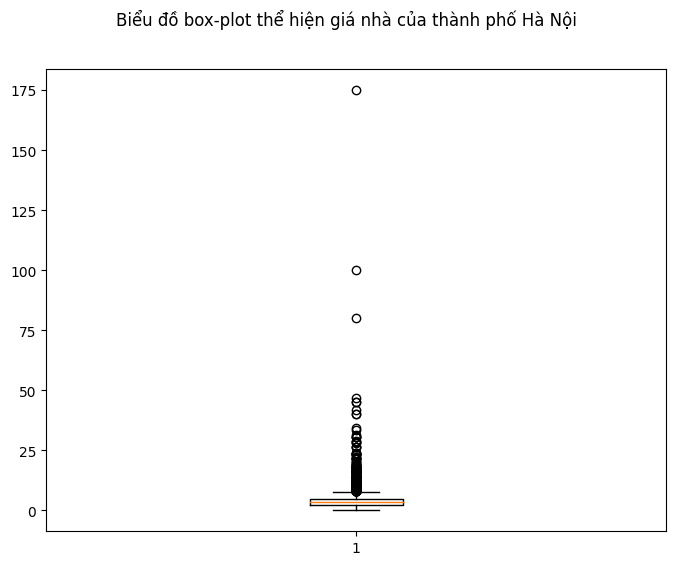

In [38]:
# Thành phố Hà Nội
arr_price_HN = np.array(df_HaNoi["Price"])
np_price_HN = arr_price_HN[~np.isnan(arr_price_HN)]
# box plot
fig = plt.figure(figsize=(8,6))
fig.suptitle("Biểu đồ box-plot thể hiện giá nhà của thành phố Hà Nội")
plt.boxplot(np_price_HN)
plt.show();

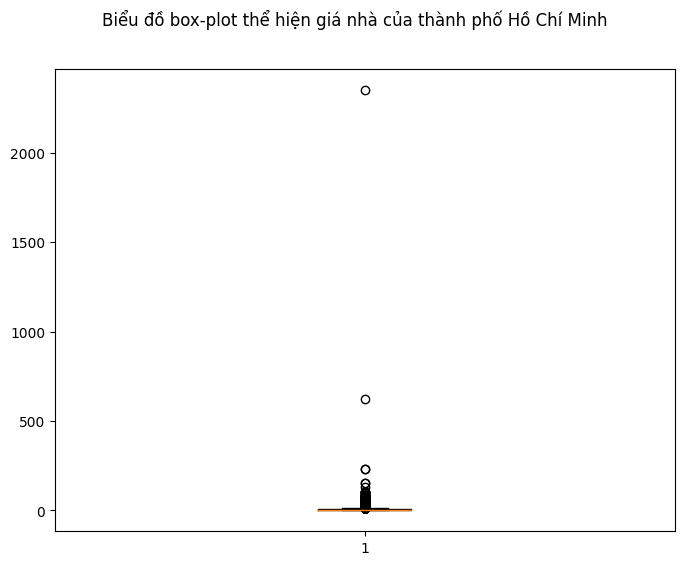

In [39]:
# Thành phố Hồ Chí Minh
arr_price_HCM = np.array(df_TpHCM["Price"])
np_price_HCM = arr_price_HCM[~np.isnan(arr_price_HCM)]
fig = plt.figure(figsize=(8,6))
fig.suptitle("Biểu đồ box-plot thể hiện giá nhà của thành phố Hồ Chí Minh")
plt.boxplot(np_price_HCM)
plt.show();

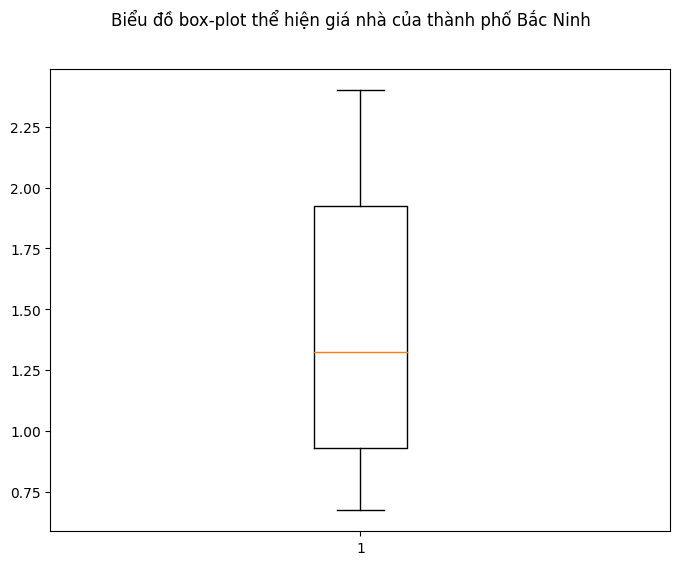

In [40]:
# Thành phố Bắc Ninh
arr_price_BacNinh = np.array(df_BacNinh["Price"])
np_price_BacNinh = arr_price_BacNinh[~np.isnan(arr_price_BacNinh)]
# box plot
fig = plt.figure(figsize=(8,6))
fig.suptitle("Biểu đồ box-plot thể hiện giá nhà của thành phố Bắc Ninh")
plt.boxplot(np_price_BacNinh)
plt.show();

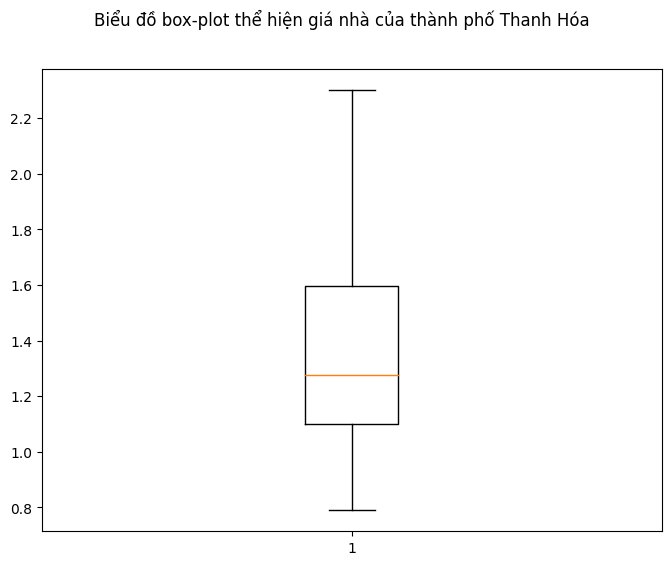

In [41]:
# Thành phố Thanh Hóa
arr_price_TH = np.array(df_ThanhHoa["Price"])
np_price_TH = arr_price_TH[~np.isnan(arr_price_TH)]
# box plot
fig = plt.figure(figsize=(8,6))
fig.suptitle("Biểu đồ box-plot thể hiện giá nhà của thành phố Thanh Hóa")
plt.boxplot(np_price_TH)
plt.show();

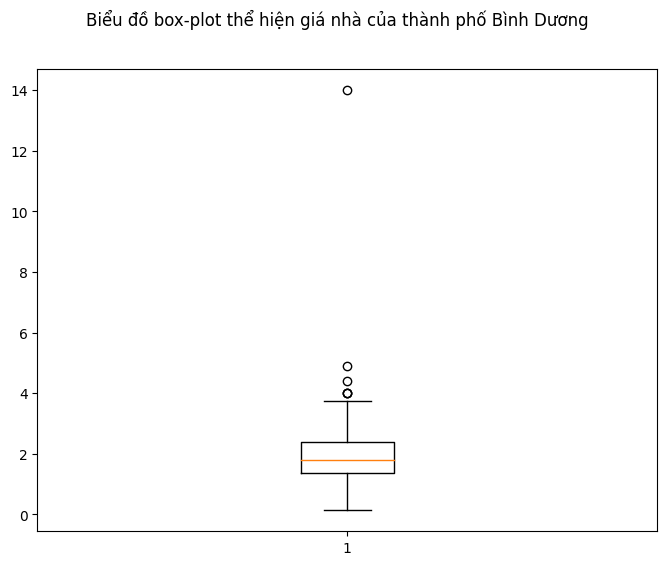

In [42]:
# Thành phố Bình Dương
arr_price_BD = np.array(df_BD["Price"])
np_price_BD = arr_price_BD[~np.isnan(arr_price_BD)]
# box plot
fig = plt.figure(figsize=(8,6))
fig.suptitle("Biểu đồ box-plot thể hiện giá nhà của thành phố Bình Dương")
plt.boxplot(np_price_BD)
plt.show();

In [43]:
# fill price
df_HousingPrice["Price"] = df_HousingPrice.groupby("City")["Price"].apply(lambda x:x.fillna(x.median()))
df_HousingPrice["Price"] = df_HousingPrice["Price"].fillna(df_HousingPrice["Price"].median())

In [44]:
# fill Facade
df_HousingPrice["Facade"] = df_HousingPrice["Facade"].fillna(0)

In [45]:
df_HousingPrice["Villa"] = df_HousingPrice["Villa"].fillna(0)

In [46]:
df_HousingPrice["Penhouse"] = df_HousingPrice["Penhouse"].fillna(0)

In [47]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       19779 non-null  float64
 1   Bedrooms   19779 non-null  int64  
 2   Bathrooms  19779 non-null  float64
 3   Facade     19779 non-null  float64
 4   Villa      19779 non-null  float64
 5   Penhouse   19779 non-null  float64
 6   District   19779 non-null  object 
 7   City       19779 non-null  object 
 8   Price      19779 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.4+ MB


# Data Visualization

In [48]:
arr_city = df_HousingPrice["City"].unique()
df_HousingPrice["City"].unique()

array([' Hồ Chí Minh', ' Hà Nội', ' Bình Dương', ' Quảng Ninh',
       ' Bà Rịa Vũng Tàu', ' Khánh Hòa', ' Đà Nẵng', ' Bắc Ninh',
       ' Hưng Yên', ' Bắc Giang', '', ' Long An', ' Bình Định',
       ' Hải Phòng', ' Thái Bình', ' Nghệ An', ' Kiên Giang', ' Đồng Nai',
       ' Bình Thuận', ' Thanh Hóa', ' Vĩnh Phúc', ' Bến Tre',
       ' Thái Nguyên', ' Tây Ninh', ' Lâm Đồng', ' Cần Thơ', ' Hải Dương',
       ' Hà Tĩnh', ' Thừa Thiên Huế', ' Ninh Thuận'], dtype=object)

In [49]:
arr_cities = []
arr_price_citiesHouse = []
for i in range(0,len(arr_city)):
    # Save the city information in the array
    arr_cities.append(arr_city[i])
    # get the house price of each city
    df_temp = df_HousingPrice[df_HousingPrice["City"] == arr_city[i]]
    arr_tempPirce = df_temp["Price"].tolist()
    # Save the house price of each city
    arr_price_citiesHouse.append(arr_tempPirce)

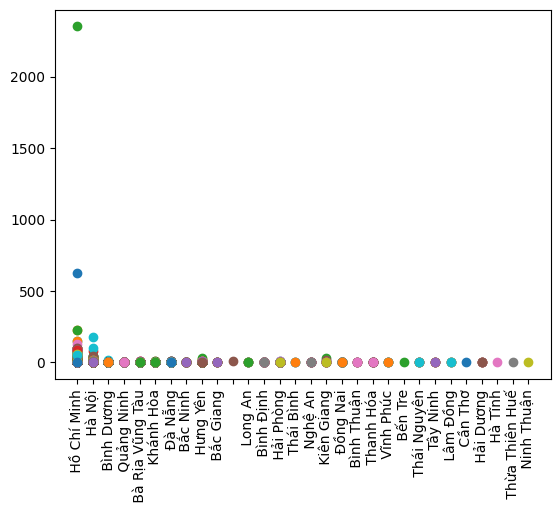

In [50]:
for i in range(len(arr_cities)):
    for j in range(len(arr_price_citiesHouse[i])):
        plt.scatter(arr_cities[i], arr_price_citiesHouse[i][j])
plt.xticks(rotation=90)
plt.show();

In [51]:
df_HousingPrice[df_HousingPrice["Price"] > 2000]

,Area,Bedrooms,Bathrooms,Facade,Villa,Penhouse,District,City,Price
618,75.0,2,2.0,0.0,0.0,0.0,Nhà Bè,Hồ Chí Minh,2350.0


In [52]:
df_HousingPrice = df_HousingPrice.drop(618,axis=0) 

In [53]:
df_HousingPrice[df_HousingPrice["Price"] > 500]

,Area,Bedrooms,Bathrooms,Facade,Villa,Penhouse,District,City,Price
1408,25.0,1,1.0,0.0,0.0,0.0,Quận 2,Hồ Chí Minh,625.0


In [54]:
df_HousingPrice = df_HousingPrice.drop(1408,axis=0) 

In [55]:
# Number of houses in cities
num_house = df_HousingPrice["City"].value_counts()
dict_house = num_house.to_dict()

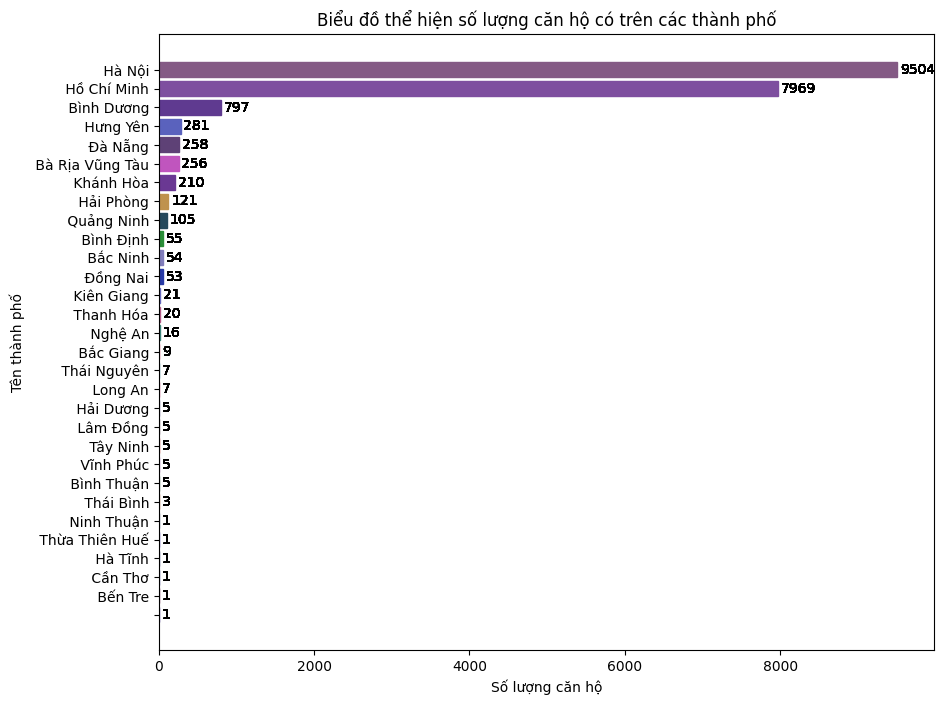

In [56]:
import random as rd
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
sorted_dict = dict(sorted(dict_house.items() , key = lambda item : item[1] , reverse=False))
ele = ax.barh(list(sorted_dict.keys()), list(sorted_dict.values()))
for i in range(len(sorted_dict)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.2 , 0.6)
    b = rd.uniform(0.2 , 0.8)
    ele[i].set_color((r,g,b))
    ax.bar_label(ax.containers[0] , label_type = 'edge' , padding = 2)
ax.set_xlabel("Số lượng căn hộ")  
ax.set_ylabel("Tên thành phố")
ax.set_title("Biểu đồ thể hiện số lượng căn hộ có trên các thành phố")
plt.show();

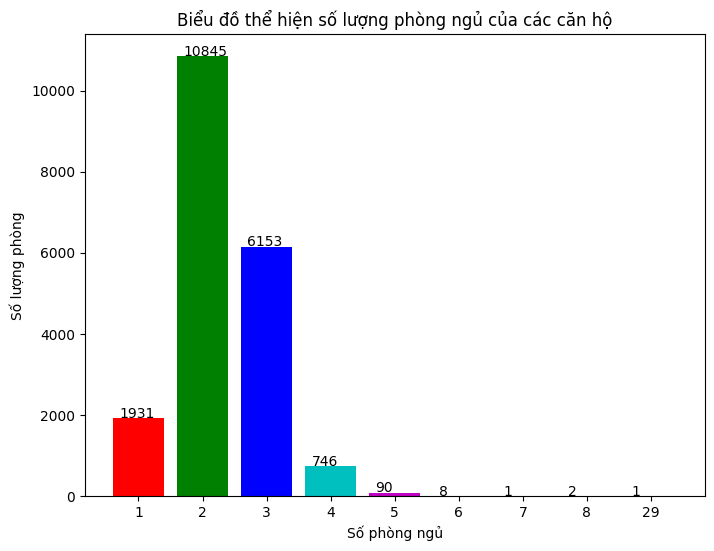

In [57]:
# Distribution of the number of bedrooms
dict_bedrooms = df_HousingPrice["Bedrooms"].value_counts().to_dict()
sorted_dict = {}
for key in sorted(dict_bedrooms.keys()):
    sorted_dict[str(key)] = dict_bedrooms[key]
fig = plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(sorted_dict.keys() , sorted_dict.values() , color = colors)
for i, v in enumerate(sorted_dict.values()):
    plt.text(i - 0.3, v + 10, str(v))
plt.xlabel("Số phòng ngủ")
plt.ylabel("Số lượng phòng")
plt.title("Biểu đồ thể hiện số lượng phòng ngủ của các căn hộ")
plt.show();

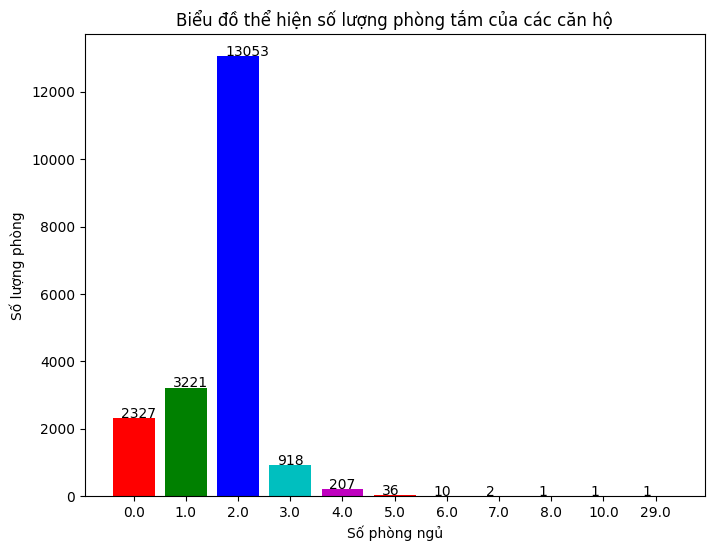

In [58]:
# Distribution of the number of bathrooms
dict_bathrooms = df_HousingPrice["Bathrooms"].value_counts().to_dict()
sorted_dict_bath = {}
for key in sorted(dict_bathrooms.keys()):
    sorted_dict_bath[str(key)] = dict_bathrooms[key]
fig = plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(sorted_dict_bath.keys() , sorted_dict_bath.values() , color = colors , width = 0.8)
for i, v in enumerate(sorted_dict_bath.values()):
    plt.text(i - 0.25, v + 10, str(v))
plt.xlabel("Số phòng ngủ")
plt.ylabel("Số lượng phòng")
plt.title("Biểu đồ thể hiện số lượng phòng tắm của các căn hộ")
plt.show();

In [59]:
# Distribution of apartment in City's district
dict_district_HN = df_HaNoi["District"].value_counts().to_dict()
dict_district_TPHCM = df_TpHCM["District"].value_counts().to_dict()
dict_district_BD = df_BD["District"].value_counts().to_dict()

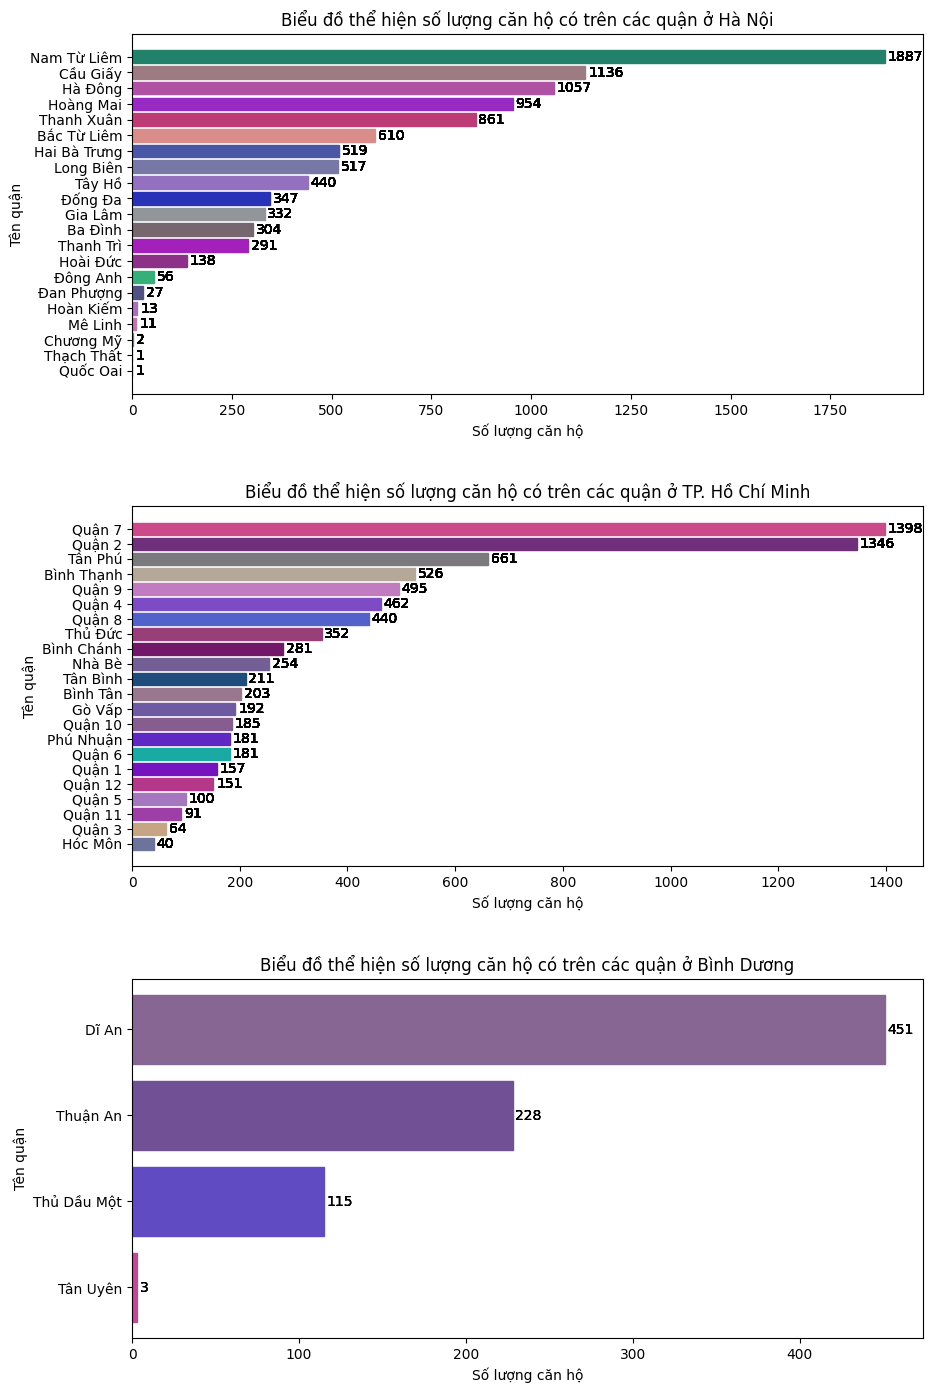

In [60]:
import random as rd
fig, axs = plt.subplots(3,1,figsize=(10, 15))
fig.tight_layout(pad=6)
                        
sorted_dict_district_HN = dict(sorted(dict_district_HN.items() , key = lambda item : item[1] , reverse=False))
sorted_dict_district_TPHCM = dict(sorted(dict_district_TPHCM.items() , key = lambda item : item[1] , reverse=False))
sorted_dict_district_BD = dict(sorted(dict_district_BD.items() , key = lambda item : item[1] , reverse=False))

ele_HN = axs[0].barh(list(sorted_dict_district_HN.keys()), list(sorted_dict_district_HN.values()))
ele_TPHCM = axs[1].barh(list(sorted_dict_district_TPHCM.keys()), list(sorted_dict_district_TPHCM.values()))
ele_BD = axs[2].barh(list(sorted_dict_district_BD.keys()), list(sorted_dict_district_BD.values()))
                        
for i in range(len(sorted_dict_district_HN)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_HN[i].set_color((r,g,b))
    axs[0].bar_label(axs[0].containers[0] , label_type = 'edge' , padding = 2)

for i in range(len(sorted_dict_district_TPHCM)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_TPHCM[i].set_color((r,g,b))
    axs[1].bar_label(axs[1].containers[0] , label_type = 'edge' , padding = 2)

for i in range(len(sorted_dict_district_BD)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_BD[i].set_color((r,g,b))
    axs[2].bar_label(axs[2].containers[0] , label_type = 'edge' , padding = 2)
                        

                        
# Hà Nội
axs[0].set_xlabel("Số lượng căn hộ")  
axs[0].set_ylabel("Tên quận")
axs[0].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở Hà Nội")
# TP. Hồ Chính Minh
axs[1].set_xlabel("Số lượng căn hộ")  
axs[1].set_ylabel("Tên quận")
axs[1].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở TP. Hồ Chí Minh")
# TP. Bình DƯơng
axs[2].set_xlabel("Số lượng căn hộ")  
axs[2].set_ylabel("Tên quận")
axs[2].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở Bình Dương")

plt.show();

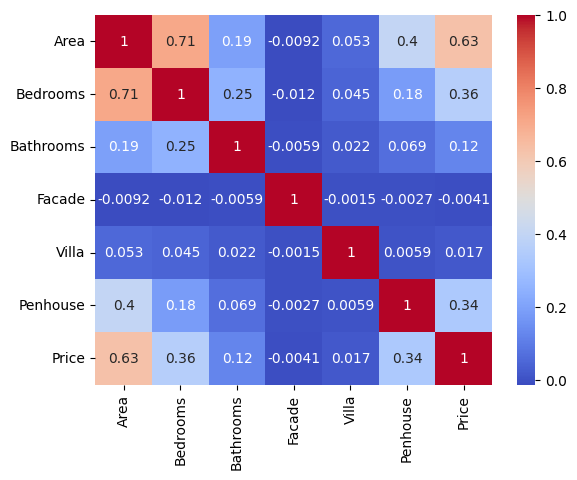

In [61]:
# correlation matrix
corr_matrix = df_HousingPrice.corr()
sns.heatmap(corr_matrix , cmap = 'coolwarm' , annot = True)
plt.show();

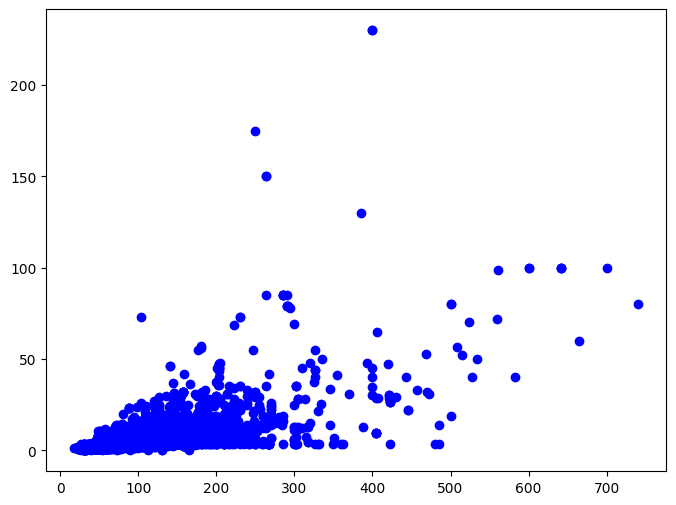

In [62]:
# scatter plot Price Area
arr_price = df_HousingPrice["Price"].to_list()
arr_area = df_HousingPrice["Area"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_area , arr_price , c = "blue")
plt.show();

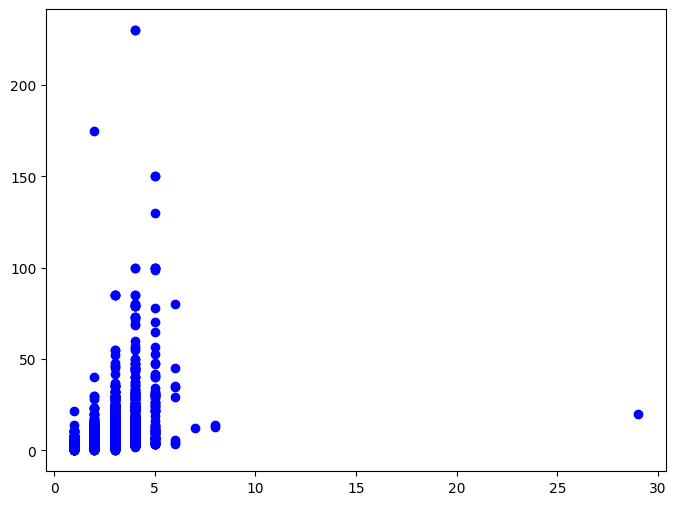

In [63]:
# scatter plot Price Bedrooms
arr_bedrooms = df_HousingPrice["Bedrooms"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_bedrooms , arr_price , c = "blue")
plt.show();

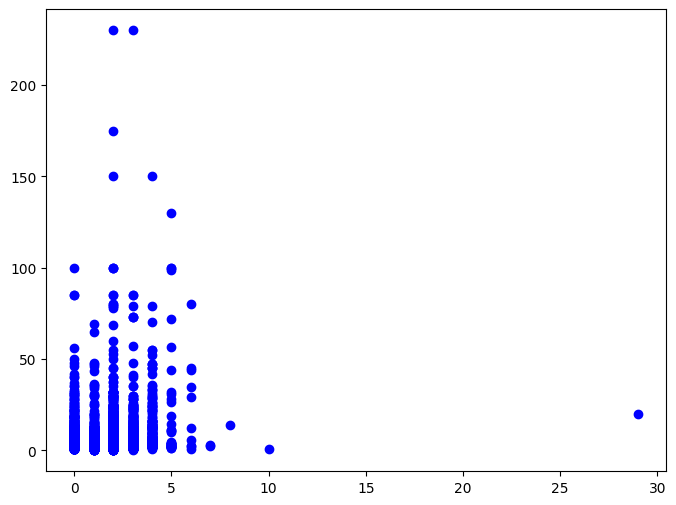

In [64]:
# scatter plot Price Bathrooms
arr_bathrooms = df_HousingPrice["Bathrooms"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_bathrooms , arr_price , c = "blue")
plt.show();

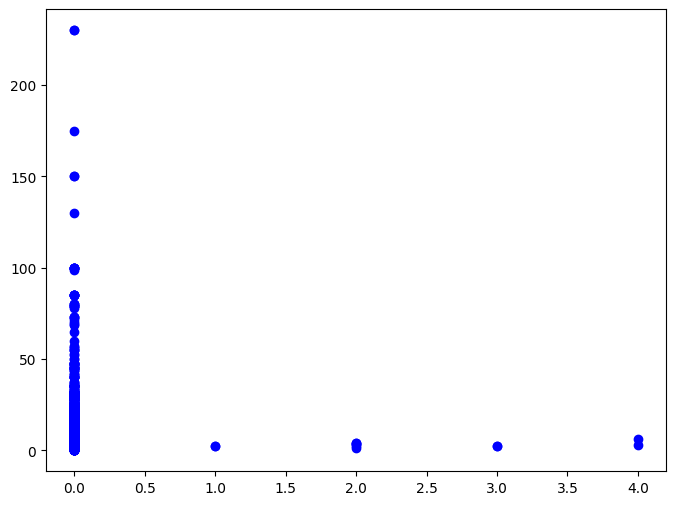

In [65]:
# scatter plot Facade
arr_facade = df_HousingPrice["Facade"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_facade , arr_price , c = "blue")
plt.show();

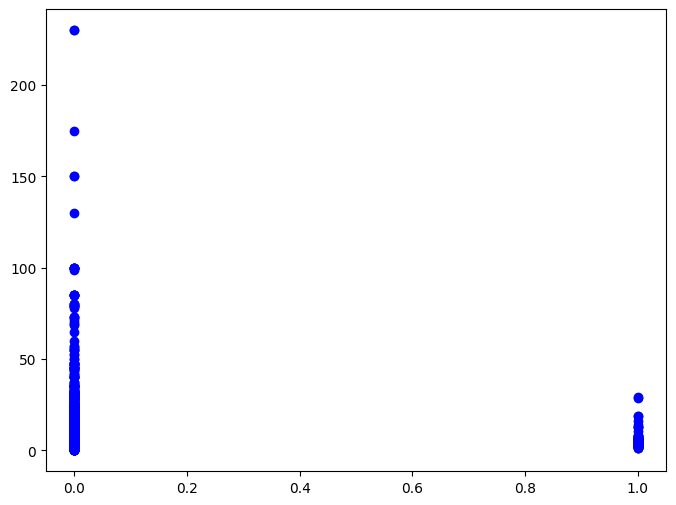

In [66]:
# scatter plot Facade
arr_villa = df_HousingPrice["Villa"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_villa , arr_price , c = "blue")
plt.show();

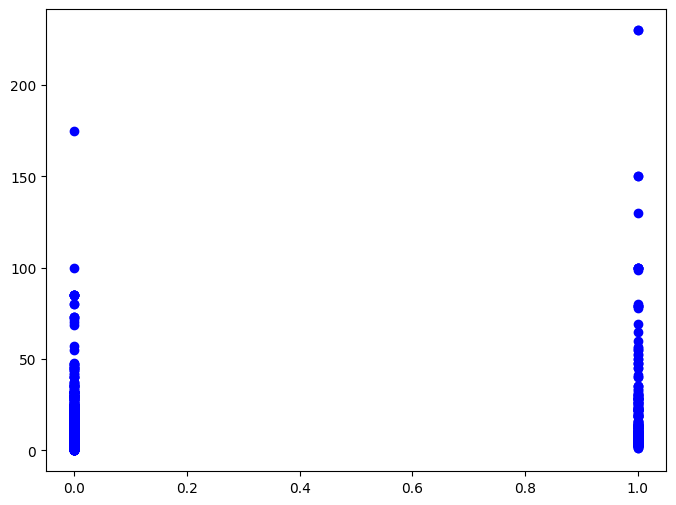

In [67]:
# scatter plot Facade
arr_penthouse = df_HousingPrice["Penhouse"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_penthouse , arr_price , c = "blue")
plt.show();

# Train Model

In [68]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [69]:
x = df_HousingPrice.drop('Price' , axis=1)
y = df_HousingPrice['Price']

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=203)

## Transform Data

In [71]:
nom_transformer = Pipeline(steps=[
	("encoder", OneHotEncoder(handle_unknown='ignore'))
])

In [72]:
# number featues
num_features = Pipeline(steps=[
	("scaler", MinMaxScaler())
])

In [73]:
# Preprocesor
preprocessor = ColumnTransformer(transformers=[
    ("nominal_featues" , nom_transformer , ["District", "City"]),
    ("number_featues" , num_features , ["Area", "Bedrooms", "Bathrooms" , "Facade" , "Villa" , "Penhouse"])
])

In [74]:
# Model
reg = Pipeline(steps=[
    ("preprocessing_data" , preprocessor),
    ("regressor" , RandomForestRegressor(n_estimators=50 , max_depth=None))
])

In [75]:
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
df_result = pd.DataFrame({'Price_Original': y_test , 'Price_Predict': y_predict})
df_result.head(10)

Pipeline(steps=[('preprocessing_data',
                 ColumnTransformer(transformers=[('nominal_featues',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['District', 'City']),
                                                 ('number_featues',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Area', 'Bedrooms',
                                                   'Bathrooms', 'Facade',
                                                   'Villa', 'Penhouse'])])),
                ('regressor', RandomForestRegressor(n_estimators=50))])

,Price_Original,Price_Predict
9311,4.90,4.765150
5195,14.30,9.016388
18319,2.69,2.608511
19314,1.70,1.667117
247,2.00,2.513323
4104,4.80,7.568280
10728,1.35,2.693219
15760,3.29,2.984338
10379,1.20,1.376779
7890,3.60,2.959811


# Evaluation model

In [76]:
print("R2: {}".format(r2_score(y_test, y_predict)))
print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))

R2: 0.8045923381071166
MAE: 0.9190903328440273
MSE: 6.3622544016288


In [77]:
df_HousingPrice

,Area,Bedrooms,Bathrooms,Facade,Villa,Penhouse,District,City,Price
0,121.0,3,2.0,0.0,0.0,0.0,Bình Thạnh,Hồ Chí Minh,8.10
1,53.0,1,1.0,0.0,0.0,0.0,Quận 7,Hồ Chí Minh,1.95
2,53.0,1,1.0,0.0,0.0,0.0,Quận 7,Hồ Chí Minh,1.70
3,70.0,3,2.0,0.0,0.0,0.0,Hà Đông,Hà Nội,2.30
4,67.0,2,2.0,0.0,0.0,0.0,Quận 7,Hồ Chí Minh,2.40
...,...,...,...,...,...,...,...,...,...
19774,80.0,2,0.0,0.0,0.0,0.0,Quận 2,Hồ Chí Minh,4.50
19775,97.0,2,2.0,0.0,0.0,0.0,Quận 6,Hồ Chí Minh,3.30
19776,117.0,3,2.0,0.0,0.0,0.0,Bình Thạnh,Hồ Chí Minh,8.30
19777,534.0,4,2.0,0.0,0.0,1.0,Quận 7,Hồ Chí Minh,49.90


# Predection with values outside the data set

![Dự đoán lần thứ nhất](image_1.png)

In [78]:
new_data = pd.DataFrame({'Area':[54] , 'Bedrooms':[2] , 'Bathrooms':[2] , 'Facade':[0] , 'Villa':[0] , 'Penhouse':[0] , 'District':["Nam Từ Liêm"] , 'City': ["Hà Nội"]})
y_pred = reg.predict(new_data)
print("Giá dự đoán: {}".format(y_pred))

Giá dự đoán: [1.9158937]


![Dự đoán lần thứ 2](image_2.png)

In [79]:
new_data_1 = pd.DataFrame({'Area':[190] , 'Bedrooms':[3] , 'Bathrooms':[2] , 'Facade':[0] , 'Villa':[0] , 'Penhouse':[0] , 'District':["Thanh Xuân"] , 'City': ["Hà Nội"]})
y_pred_1 = reg.predict(new_data_1)
print("Giá dự đoán: {}".format(y_pred_1))

Giá dự đoán: [7.98909333]


![Dự đoán lần 3](image_5.png)

In [80]:
new_data_2 = pd.DataFrame({'Area':[150] , 'Bedrooms':[4] , 'Bathrooms':[3] , 'Facade':[1] , 'Villa':[1] , 'Penhouse':[0] , 'District':["Gia Lâm"] , 'City': ["Hà Nội"]})
y_pred_2 = reg.predict(new_data_2)
print("Giá dự đoán: {}".format(y_pred_2))

Giá dự đoán: [8.2329]


![Dự đoán lần thứ 4](image_4.png)

In [81]:
new_data_3 = pd.DataFrame({'Area':[266] , 'Bedrooms':[6] , 'Bathrooms':[6] , 'Facade':[2] , 'Villa':[1] , 'Penhouse':[0] , 'District':["Hoàng Mai"] , 'City': ["Hà Nội"]})
y_pred_3 = reg.predict(new_data_3)
print("Giá dự đoán: {}".format(y_pred_3))

Giá dự đoán: [15.13186]
